# 🛠️ Engenharia de Features
Nesta etapa, vamos transformar os dados brutos em representações mais informativas para os modelos de machine learning.
## 🔍 1. Objetivo

O objetivo da engenharia de features é melhorar a qualidade do modelo ao criar ou transformar variáveis que melhorem sua capacidade preditiva.


In [10]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
# Mostrar mais linhas (padrão é 10)
pd.set_option('display.max_rows', 100)

# Mostrar largura completa da tela
pd.set_option('display.width', None)

# Evita corte de conteúdo dentro das colunas
pd.set_option('display.max_colwidth', None)

## 📦 2. Base de Dados Carregada

In [11]:
df_processed = pd.read_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/aneel_processed.csv', encoding='utf-8-sig')
df_processed

,distribuidora,operacao,duracao_fila,data_hora_inicio_atendimento,duracao_atendimento,finalizacao,id_agente_anonimizado,data_hora_intervalo,skill,ani_valido,short_call_ate_30,flag_pesquisa,resposta_1,resposta_2,resposta_3,telefone_anonimizado,telefone_anonimizado_novo,telefone_valido,linha_valida,tempo_ate_proxima,rechamada,rechamou_30dias,rechamou_1h,rechamou_30min,rechamou_24h,short_call_30s,operacao_codificado,skill_codificado,distribuidora_codificado,finalizacao_codificado,hora
0,EMPRESA_D,CAC1,0,2025-04-07 17:56:31,287,normal,cec_rafaela.catao@cac1.com.br,2025-04-07 17:30:00,GERAL,0,0,0,0,0,0,1.111107e+10,11111071988,1,1,0 days 00:06:54,1,1,1,1,1,0,1,24,13,5,17
1,EMPRESA_D,CAC1,0,2025-04-07 18:03:25,834,normal,cec_heleny.costa@cac1.com.br,2025-04-07 18:00:00,GERAL,0,0,0,0,0,0,1.111107e+10,11111071988,1,1,NaN,0,0,0,0,0,0,1,24,13,5,18
2,EMPRESA_E,CAC2,5,2025-02-19 07:43:34,208,transferida,7490432@cac2.com.br,2025-02-19 07:30:00,CANCEL ENC,0,0,1,5,1,0,1.111108e+10,11111078104,1,1,0 days 01:16:59,1,1,0,0,1,0,2,2,17,6,7
3,EMPRESA_E,CAC1,0,2025-02-19 09:00:33,449,transferida,cec_larissa.rfranca@cac1.com.br,2025-02-19 09:00:00,CANCEL ENC,0,0,1,0,0,0,1.111108e+10,11111078104,1,1,NaN,0,0,0,0,0,0,1,2,17,6,9
4,EMPRESA_D,CAC,0,2024-07-10 11:07:26,70,normal,69774959718.0,2024-07-10 11:00,GERAL,1,0,0,0,0,0,1.111109e+10,11111088577,1,1,NaN,0,0,0,0,0,0,0,24,13,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793439,EMPRESA_B_OUV,CAC1,0,2024-10-21 10:12:23,768,normal,cec_e.franklin.paz@cac1.com.br,2024-10-21 10:00:00,OUV SAC,0,0,0,0,0,0,9.989997e+09,9989997000,1,1,9 days 22:05:03,1,1,0,0,0,0,1,37,8,5,10
15793440,EMPRESA_B_GA,CAC1,0,2024-10-31 08:17:26,697,normal,cec_e.wirlliane.alves@cac1.com.br,2024-10-31 08:00:00,GA GERAL,0,0,0,0,0,0,9.989997e+09,9989997000,1,1,0 days 00:16:54,1,1,1,1,1,0,1,19,6,5,8
15793441,EMPRESA_B_OUV,CEC,103,2024-10-31 08:34:20,668,transferida,denise.santos@cec.com,2024-10-31 08:30:00,OUV RECLAMACOES,0,0,1,4,0,0,9.989997e+09,9989997000,1,1,NaN,0,0,0,0,0,0,3,35,8,6,8
15793442,EMPRESA_B,CAC1,0,2025-04-07 08:14:45,268,transferida,cec_sulamita.hellen@cac1.com.br,2025-04-07 08:00:00,LIG NOVA TROCA TIT,0,0,0,0,0,0,9.989998e+09,9989998383,1,1,0 days 00:04:24,1,1,1,1,1,0,1,27,5,6,8


In [3]:
# Garante que a data esteja correta
df_processed['data_hora_inicio_atendimento'] = pd.to_datetime(df_processed['data_hora_inicio_atendimento'])

# Ordena por agente e data
df_processed = df_processed.sort_values(['id_agente_anonimizado', 'data_hora_inicio_atendimento']).reset_index(drop=True)

# Acumulado por id_agente_anonimizado, até a linha anterior
df_processed['rech_30min_acum'] = df_processed.groupby('id_agente_anonimizado')['rechamou_30min'].cumsum().shift(1)
df_processed['rech_24h_acum'] = df_processed.groupby('id_agente_anonimizado')['rechamou_24h'].cumsum().shift(1)

# Evita divisão por zero
df_processed['rech_24h_acum'] = df_processed['rech_24h_acum'].replace(0, 1e-6)

# Cria a feature: média histórica por agente até aquele atendimento
df_processed['media_rechamada_agente'] = df_processed['rech_30min_acum'] / df_processed['rech_24h_acum']
df_processed

,distribuidora,operacao,duracao_fila,data_hora_inicio_atendimento,duracao_atendimento,finalizacao,id_agente_anonimizado,data_hora_intervalo,skill,ani_valido,short_call_ate_30,flag_pesquisa,resposta_1,resposta_2,resposta_3,telefone_anonimizado,telefone_anonimizado_novo,telefone_valido,linha_valida,tempo_ate_proxima,rechamada,rechamou_30dias,rechamou_1h,rechamou_30min,rechamou_24h,short_call_30s,operacao_codificado,skill_codificado,distribuidora_codificado,finalizacao_codificado,hora,rech_30min_acum,rech_24h_acum,media_rechamada_agente
0,EMPRESA_B,CAC,0,2024-01-01 17:31:30,186,transferida,1008129799.0,2024-01-01 17:30,FALTA ENERGIA,1,0,1,5,1,0,9.916953e+10,99169534552,1,1,6 days 15:49:11,1,1,0,0,0,0,0,12,5,6,17,NaN,NaN,NaN
1,EMPRESA_B,CAC,0,2024-01-01 17:46:32,289,transferida,1008129799.0,2024-01-01 17:30,FALTA ENERGIA,1,0,1,0,0,0,9.411618e+10,94116175465,1,1,NaN,0,0,0,0,0,0,0,12,5,6,17,0.0,0.000001,0.0
2,EMPRESA_B,CAC,0,2024-01-01 17:59:39,218,transferida,1008129799.0,2024-01-01 17:30,FERISCOAVIDA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,14 days 22:35:57,1,1,0,0,0,0,0,13,5,6,17,0.0,0.000001,0.0
3,EMPRESA_B,CAC,0,2024-01-01 18:18:29,296,normal,1008129799.0,2024-01-01 18:00,FALTA ENERGIA,1,0,0,0,0,0,3.611972e+10,36119716332,1,1,63 days 05:21:36,1,0,0,0,0,0,0,12,5,5,18,0.0,0.000001,0.0
4,EMPRESA_B,CAC,0,2024-01-01 18:34:02,207,transferida,1008129799.0,2024-01-01 18:30,FALTA ENERGIA,1,0,0,0,0,0,9.811384e+10,98113838323,1,1,80 days 00:19:15,1,0,0,0,0,0,0,12,5,6,18,0.0,0.000001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793439,EMPRESA_B,CAC1,0,2025-05-03 22:54:20,150,normal,NaN,2025-05-03 22:30:00,FALTA ENERGIA,0,0,0,0,0,0,6.914535e+10,69145347572,1,1,NaN,0,0,0,0,0,0,1,12,5,5,22,NaN,NaN,NaN
15793440,EMPRESA_E,CAC1,1496,2025-05-03 22:56:47,210,transferida,NaN,2025-05-03 22:30:00,FALTA ENERGIA,0,0,0,0,0,0,4.711118e+10,47111184201,1,1,NaN,0,0,0,0,0,0,1,12,17,6,22,NaN,NaN,NaN
15793441,EMPRESA_E,CAC1,1578,2025-05-03 22:57:11,591,normal,NaN,2025-05-03 22:30:00,GERAL,0,0,0,0,0,0,4.711400e+10,47114004661,1,1,NaN,0,0,0,0,0,0,1,24,17,5,22,NaN,NaN,NaN
15793442,EMPRESA_C,CAC1,1359,2025-05-03 23:00:17,1078,transferida,NaN,2025-05-03 22:30:00,FALTA ENERGIA,0,0,0,0,0,0,6.914451e+10,69144511066,1,1,NaN,0,0,0,0,0,0,1,12,9,6,23,NaN,NaN,NaN


In [4]:
"""# Garantir datetime
df_processed['data_hora_inicio_atendimento'] = pd.to_datetime(df_processed['data_hora_inicio_atendimento'])

# Ordenar por agente e data
df_processed = df_processed.sort_values(['id_agente_anonimizado', 'data_hora_inicio_atendimento'])

# Rolling 30D com shift
rech_30d = (
    df_processed
    .groupby('id_agente_anonimizado')
    .rolling('30D', on='data_hora_inicio_atendimento')['rechamou_30min']
    .mean()
    .shift(1)
    .reset_index()
)

# Mapear de volta corretamente
df_processed['media_rechamada_agente_30d'] = rech_30d['rechamou_30min']

# Mesma lógica para 15D e 7D
rech_15d = (
    df_processed
    .groupby('id_agente_anonimizado')
    .rolling('15D', on='data_hora_inicio_atendimento')['rechamou_30min']
    .mean()
    .shift(1)
    .reset_index()
)
df_processed[ 'media_rechamada_agente_15d'] = rech_15d['rechamou_30min']

rech_7d = (
    df_processed
    .groupby('id_agente_anonimizado')
    .rolling('7D', on='data_hora_inicio_atendimento')['rechamou_30min']
    .mean()
    .shift(1)
    .reset_index()
)
df_processed['media_rechamada_agente_7d'] = rech_7d['rechamou_30min']
"""

"# Garantir datetime\ndf_processed['data_hora_inicio_atendimento'] = pd.to_datetime(df_processed['data_hora_inicio_atendimento'])\n\n# Ordenar por agente e data\ndf_processed = df_processed.sort_values(['id_agente_anonimizado', 'data_hora_inicio_atendimento'])\n\n# Rolling 30D com shift\nrech_30d = (\n    df_processed\n    .groupby('id_agente_anonimizado')\n    .rolling('30D', on='data_hora_inicio_atendimento')['rechamou_30min']\n    .mean()\n    .shift(1)\n    .reset_index()\n)\n\n# Mapear de volta corretamente\ndf_processed['media_rechamada_agente_30d'] = rech_30d['rechamou_30min']\n\n# Mesma lógica para 15D e 7D\nrech_15d = (\n    df_processed\n    .groupby('id_agente_anonimizado')\n    .rolling('15D', on='data_hora_inicio_atendimento')['rechamou_30min']\n    .mean()\n    .shift(1)\n    .reset_index()\n)\ndf_processed[ 'media_rechamada_agente_15d'] = rech_15d['rechamou_30min']\n\nrech_7d = (\n    df_processed\n    .groupby('id_agente_anonimizado')\n    .rolling('7D', on='data_hora_i

In [4]:
df_processed = df_processed.sort_values(['telefone_anonimizado_novo', 'data_hora_inicio_atendimento']).reset_index(drop=True)

# Acumulado por telefone_anonimizado_novo, até a linha anterior
df_processed['rech_30min_acum_cli'] = df_processed.groupby('telefone_anonimizado_novo')['rechamou_30min'].cumsum().shift(1)
df_processed['rech_24h_acum_cli'] = df_processed.groupby('telefone_anonimizado_novo')['rechamou_24h'].cumsum().shift(1)

# Evita divisão por zero
df_processed['rech_24h_acum_cli'] = df_processed['rech_24h_acum_cli'].replace(0, 1e-6)

# Cria a feature: média histórica por agente até aquele atendimento
df_processed['media_rechamada_cliente'] = df_processed['rech_30min_acum_cli'] / df_processed['rech_24h_acum_cli']

In [5]:
# Garantir que está ordenado
df_processed = df_processed.sort_values(['telefone_anonimizado_novo', 'data_hora_inicio_atendimento']).reset_index(drop=True)

# Calcular tempo entre chamadas
df_processed['tempo_entre_chamadas'] = (
    df_processed.groupby('telefone_anonimizado_novo')['data_hora_inicio_atendimento']
    .diff()
    .dt.total_seconds() / 60  # minutos
)

# Calcular média acumulada (sem vazamento, com shift)
media_temp_acumulada = (
    df_processed.groupby('telefone_anonimizado_novo')['tempo_entre_chamadas']
    .expanding()
    .mean()
    .shift(1)
    .droplevel(0)
)

df_processed['media_tempo_entre_chamadas'] = media_temp_acumulada

In [7]:
""""#média móvel 30 dias
media_temp_30d = (
    df_processed
    .groupby('telefone_anonimizado_novo')
    .rolling('30D', on='data_hora_inicio_atendimento')['tempo_entre_chamadas']
    .mean()
    .shift(1)
    .reset_index() 
)

df_processed['media_tempo_entre_chamadas_30d'] = media_temp_30d['tempo_entre_chamadas']

#Média móvel 15 dias
media_temp_15d = (
    df_processed
    .groupby('telefone_anonimizado_novo')
    .rolling('15D', on='data_hora_inicio_atendimento')['tempo_entre_chamadas']
    .mean()
    .shift(1)
    .reset_index()  
)

df_processed['media_tempo_entre_chamadas_15d'] = media_temp_15d['tempo_entre_chamadas']

#Média móvel 7 dias
media_temp_7d = (
    df_processed
    .groupby('telefone_anonimizado_novo')
    .rolling('7D', on='data_hora_inicio_atendimento')['tempo_entre_chamadas']
    .mean()
    .shift(1)
    .reset_index()  
)

df_processed['media_tempo_entre_chamadas_7d'] = media_temp_7d['tempo_entre_chamadas']

df_processed"""

'"#média móvel 30 dias\nmedia_temp_30d = (\n    df_processed\n    .groupby(\'telefone_anonimizado_novo\')\n    .rolling(\'30D\', on=\'data_hora_inicio_atendimento\')[\'tempo_entre_chamadas\']\n    .mean()\n    .shift(1)\n    .reset_index() \n)\n\ndf_processed[\'media_tempo_entre_chamadas_30d\'] = media_temp_30d[\'tempo_entre_chamadas\']\n\n#Média móvel 15 dias\nmedia_temp_15d = (\n    df_processed\n    .groupby(\'telefone_anonimizado_novo\')\n    .rolling(\'15D\', on=\'data_hora_inicio_atendimento\')[\'tempo_entre_chamadas\']\n    .mean()\n    .shift(1)\n    .reset_index()  \n)\n\ndf_processed[\'media_tempo_entre_chamadas_15d\'] = media_temp_15d[\'tempo_entre_chamadas\']\n\n#Média móvel 7 dias\nmedia_temp_7d = (\n    df_processed\n    .groupby(\'telefone_anonimizado_novo\')\n    .rolling(\'7D\', on=\'data_hora_inicio_atendimento\')[\'tempo_entre_chamadas\']\n    .mean()\n    .shift(1)\n    .reset_index()  \n)\n\ndf_processed[\'media_tempo_entre_chamadas_7d\'] = media_temp_7d[\'tempo_en

In [6]:

def periodo_do_dia(hora):
    if 6 <= hora < 12:
        return '0' # Manhã
    elif 12 <= hora < 18:
        return '1' # Tarde
    elif 18 <= hora < 24:
        return '2' # Noite
    else:
        return '3' # Madrugada

df_processed['periodo'] = df_processed['hora'].apply(periodo_do_dia)

# Retorna número: 0 = segunda-feira, 6 = domingo
df_processed['dia_semana_num'] = df_processed['data_hora_inicio_atendimento'].dt.weekday

df_processed['dia_de_semana'] = df_processed['dia_semana_num'].apply(lambda x: '1' if x <= 5 else '0')

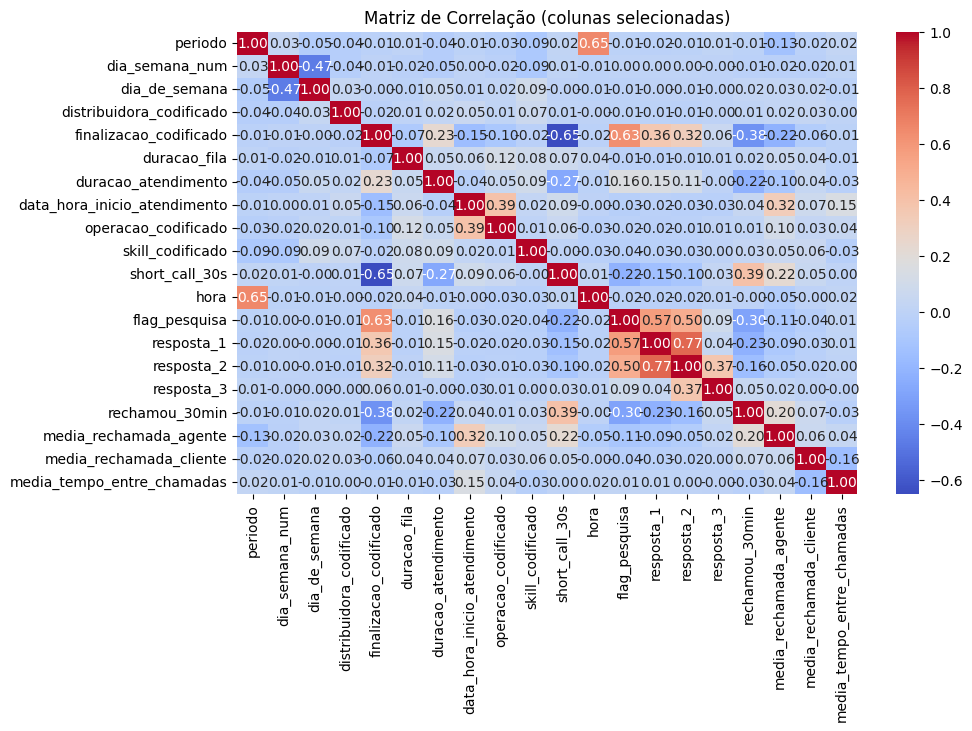

In [9]:
cols = ['periodo','dia_semana_num','dia_de_semana','distribuidora_codificado','finalizacao_codificado','duracao_fila', 'duracao_atendimento', 'data_hora_inicio_atendimento', 'operacao_codificado', 'skill_codificado','short_call_30s', 'hora', 'flag_pesquisa', 'resposta_1', 'resposta_2', 'resposta_3', 'rechamou_30min','media_rechamada_agente','media_rechamada_cliente', 'media_tempo_entre_chamadas']

correlation_matrix = df_processed[cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação (colunas selecionadas)")
plt.show()

In [7]:
# Filtrar registros em que a coluna telefone == 45050944
df_filtered = df_processed[df_processed['telefone_anonimizado_novo'] == 91114190928] #91114190928

# Mostrar os resultados
display(df_filtered)

,distribuidora,operacao,duracao_fila,data_hora_inicio_atendimento,duracao_atendimento,finalizacao,id_agente_anonimizado,data_hora_intervalo,skill,ani_valido,short_call_ate_30,flag_pesquisa,resposta_1,resposta_2,resposta_3,telefone_anonimizado,telefone_anonimizado_novo,telefone_valido,linha_valida,tempo_ate_proxima,rechamada,rechamou_30dias,rechamou_1h,rechamou_30min,rechamou_24h,short_call_30s,operacao_codificado,skill_codificado,distribuidora_codificado,finalizacao_codificado,hora,rech_30min_acum,rech_24h_acum,media_rechamada_agente,rech_30min_acum_cli,rech_24h_acum_cli,media_rechamada_cliente,tempo_entre_chamadas,media_tempo_entre_chamadas,periodo,dia_semana_num,dia_de_semana
13092261,EMPRESA_B,CAC,0,2024-01-01 17:59:39,218,transferida,1008129799.0,2024-01-01 17:30,FERISCOAVIDA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,14 days 22:35:57,1,1,0,0,0,0,0,13,5,6,17,0.0,0.000001,0.000000,0.0,0.000001,0.000000,NaN,NaN,1,0,1
13092262,EMPRESA_B,CAC2,0,2024-01-16 16:35:36,448,transferida,11195132551350.0,2024-01-16 16:30,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 15:17:02,1,1,0,0,1,0,2,24,5,6,16,44.0,73.000000,0.602740,0.0,0.000001,0.000000,21515.950000,NaN,1,1,1
13092263,EMPRESA_B,CAC2,0,2024-01-17 07:52:38,224,transferida,11105014580359.0,2024-01-17 07:30,FALTA ENERGIA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 09:49:36,1,1,0,0,1,0,2,12,5,6,7,79.0,173.000000,0.456647,0.0,1.000000,0.000000,917.033333,21515.950000,0,2,1
13092264,EMPRESA_B,CAC,0,2024-01-17 17:42:14,611,transferida,74474042792.0,2024-01-17 17:30,FALTA ENERGIA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,4 days 21:30:28,1,1,0,0,0,0,0,12,5,6,17,49.0,120.000000,0.408333,0.0,2.000000,0.000000,589.600000,11216.491667,1,2,1
13092265,EMPRESA_B,CAC,0,2024-01-22 15:12:42,359,transferida,98882866782.0,2024-01-22 15:00,ILUM PUB,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,60 days 00:22:37,1,0,0,0,0,0,0,26,5,6,15,130.0,337.000000,0.385757,0.0,2.000000,0.000000,7050.466667,7674.194444,1,0,1
13092266,EMPRESA_B,CAC,0,2024-03-22 15:35:19,332,transferida,90326204735.0,2024-03-22 15:30,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 00:37:30,1,1,1,0,1,0,0,24,5,6,15,232.0,430.000000,0.539535,0.0,2.000000,0.000000,86422.616667,7518.262500,1,4,1
13092267,EMPRESA_B,CAC2,0,2024-03-22 16:12:49,31,transferida,11192594721370.0,2024-03-22 16:00,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 00:03:29,1,1,1,1,1,0,2,24,5,6,16,695.0,936.000000,0.742521,0.0,3.000000,0.000000,37.500000,23299.133333,1,4,1
13092268,EMPRESA_B,CAC,0,2024-03-22 16:16:18,517,normal,90680867770.0,2024-03-22 16:00,REC DE CONTAS,1,0,0,0,0,0,9.111419e+10,91114190928,1,1,30 days 21:36:20,1,0,0,0,0,0,0,39,5,5,16,332.0,721.000000,0.460472,1.0,4.000000,0.250000,3.483333,19422.194444,1,4,1
13092269,EMPRESA_B,CAC,0,2024-04-22 13:52:38,255,transferida,97416462750.0,2024-04-22 13:30,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,62 days 22:55:03,1,0,0,0,0,0,0,24,5,6,13,624.0,979.000000,0.637385,1.0,4.000000,0.250000,44496.333333,16648.092857,1,0,1
13092270,EMPRESA_B,CAC,0,2024-06-24 12:47:41,533,normal,95038025701.0,2024-06-24 12:30,GERAL,1,0,0,0,0,0,9.111419e+10,91114190928,1,1,28 days 19:41:58,1,1,0,0,0,0,0,24,5,5,12,159.0,471.000000,0.337580,1.0,4.000000,0.250000,90655.050000,20129.122917,1,0,1


In [11]:
#df_processing_eng_feat = df_processed[['distribuidora_codificado', 'distribuidora', 'duracao_fila', 'duracao_atendimento', 'data_hora_inicio_atendimento', 'operacao_codificado', 'operacao', 'skill_codificado', 'skill', 'short_call_30s', 'hora', 'flag_pesquisa', 'resposta_1', 'resposta_2', 'resposta_3', 'rechamou_30min','media_rechamada_agente','media_rechamada_agente_7d','media_rechamada_agente_15d','media_rechamada_agente_30d','media_rechamada_cliente', 'media_tempo_entre_chamadas','media_tempo_entre_chamadas_7d','media_tempo_entre_chamadas_15d','media_tempo_entre_chamadas_30d']]
df_processing_eng_feat = df_processed[['distribuidora_codificado', 'distribuidora', 'duracao_fila', 'duracao_atendimento', 'data_hora_inicio_atendimento', 'operacao_codificado', 'operacao', 'skill_codificado', 'skill', 'short_call_30s', 'hora', 'flag_pesquisa', 'resposta_1', 'resposta_2', 'resposta_3', 'rechamou_30min','media_rechamada_agente','media_rechamada_cliente', 'media_tempo_entre_chamadas','periodo','dia_semana_num','dia_de_semana','finalizacao_codificado']]

In [12]:
display(df_processing_eng_feat)

,distribuidora_codificado,distribuidora,duracao_fila,duracao_atendimento,data_hora_inicio_atendimento,operacao_codificado,operacao,skill_codificado,skill,short_call_30s,hora,flag_pesquisa,resposta_1,resposta_2,resposta_3,rechamou_30min,media_rechamada_agente,media_rechamada_cliente,media_tempo_entre_chamadas,periodo,dia_semana_num,dia_de_semana,finalizacao_codificado
0,1,EMPRESA_A,0,879,2024-05-09 12:21:45,3,CEC,36,OUV RELIGACAO,0,12,1,5,1,0,0,0.329596,NaN,NaN,1,3,1,6
1,9,EMPRESA_C,1,329,2024-03-25 15:41:56,0,CAC,24,GERAL,0,15,1,0,0,0,0,0.388942,0.000000,NaN,1,0,1,6
2,9,EMPRESA_C,0,786,2024-05-23 22:29:03,2,CAC2,24,GERAL,0,22,1,5,1,0,0,0.479332,0.000000,NaN,2,3,1,6
3,9,EMPRESA_C,0,305,2024-08-12 12:03:07,0,CAC,24,GERAL,0,12,1,5,1,0,0,0.333546,0.000000,85367.116667,1,0,1,6
4,9,EMPRESA_C,0,405,2024-08-12 14:19:52,0,CAC,24,GERAL,0,14,1,5,1,0,0,0.489175,0.000000,100690.591667,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793439,13,EMPRESA_D,1,443,2024-10-05 16:36:46,1,CAC1,24,GERAL,0,16,1,5,1,0,0,0.493333,0.454545,19527.114167,1,5,1,6
15793440,13,EMPRESA_D,1,252,2024-10-07 15:57:58,1,CAC1,24,GERAL,0,15,1,0,0,0,0,0.405405,0.454545,18597.407143,1,0,1,6
15793441,13,EMPRESA_D,2,221,2024-10-07 19:02:23,2,CAC2,24,GERAL,0,19,1,0,0,0,0,0.554455,0.416667,17881.215909,2,0,1,6
15793442,9,EMPRESA_C,0,309,2024-08-30 14:58:23,0,CAC,50,TROCA TITULAR,0,14,1,0,0,0,0,0.654626,0.416667,17111.789855,1,4,1,6


In [8]:
# localizando as chamadas de uma id_agente_anonimizado específica

df_teste = df_processed[df_processed['telefone_anonimizado_novo'] == 91114190928]
df_teste = df_teste.sort_values('data_hora_inicio_atendimento')
df_teste
df_teste.to_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/aneel_processed_teste_cliente.csv', index=False, encoding='utf-8-sig')

In [9]:
df_teste

,distribuidora,operacao,duracao_fila,data_hora_inicio_atendimento,duracao_atendimento,finalizacao,id_agente_anonimizado,data_hora_intervalo,skill,ani_valido,short_call_ate_30,flag_pesquisa,resposta_1,resposta_2,resposta_3,telefone_anonimizado,telefone_anonimizado_novo,telefone_valido,linha_valida,tempo_ate_proxima,rechamada,rechamou_30dias,rechamou_1h,rechamou_30min,rechamou_24h,short_call_30s,operacao_codificado,skill_codificado,distribuidora_codificado,finalizacao_codificado,hora,rech_30min_acum,rech_24h_acum,media_rechamada_agente,rech_30min_acum_cli,rech_24h_acum_cli,media_rechamada_cliente,tempo_entre_chamadas,media_tempo_entre_chamadas,periodo,dia_semana_num,dia_de_semana
13092261,EMPRESA_B,CAC,0,2024-01-01 17:59:39,218,transferida,1008129799.0,2024-01-01 17:30,FERISCOAVIDA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,14 days 22:35:57,1,1,0,0,0,0,0,13,5,6,17,0.0,0.000001,0.000000,0.0,0.000001,0.000000,NaN,NaN,1,0,1
13092262,EMPRESA_B,CAC2,0,2024-01-16 16:35:36,448,transferida,11195132551350.0,2024-01-16 16:30,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 15:17:02,1,1,0,0,1,0,2,24,5,6,16,44.0,73.000000,0.602740,0.0,0.000001,0.000000,21515.950000,NaN,1,1,1
13092263,EMPRESA_B,CAC2,0,2024-01-17 07:52:38,224,transferida,11105014580359.0,2024-01-17 07:30,FALTA ENERGIA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 09:49:36,1,1,0,0,1,0,2,12,5,6,7,79.0,173.000000,0.456647,0.0,1.000000,0.000000,917.033333,21515.950000,0,2,1
13092264,EMPRESA_B,CAC,0,2024-01-17 17:42:14,611,transferida,74474042792.0,2024-01-17 17:30,FALTA ENERGIA,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,4 days 21:30:28,1,1,0,0,0,0,0,12,5,6,17,49.0,120.000000,0.408333,0.0,2.000000,0.000000,589.600000,11216.491667,1,2,1
13092265,EMPRESA_B,CAC,0,2024-01-22 15:12:42,359,transferida,98882866782.0,2024-01-22 15:00,ILUM PUB,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,60 days 00:22:37,1,0,0,0,0,0,0,26,5,6,15,130.0,337.000000,0.385757,0.0,2.000000,0.000000,7050.466667,7674.194444,1,0,1
13092266,EMPRESA_B,CAC,0,2024-03-22 15:35:19,332,transferida,90326204735.0,2024-03-22 15:30,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 00:37:30,1,1,1,0,1,0,0,24,5,6,15,232.0,430.000000,0.539535,0.0,2.000000,0.000000,86422.616667,7518.262500,1,4,1
13092267,EMPRESA_B,CAC2,0,2024-03-22 16:12:49,31,transferida,11192594721370.0,2024-03-22 16:00,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,0 days 00:03:29,1,1,1,1,1,0,2,24,5,6,16,695.0,936.000000,0.742521,0.0,3.000000,0.000000,37.500000,23299.133333,1,4,1
13092268,EMPRESA_B,CAC,0,2024-03-22 16:16:18,517,normal,90680867770.0,2024-03-22 16:00,REC DE CONTAS,1,0,0,0,0,0,9.111419e+10,91114190928,1,1,30 days 21:36:20,1,0,0,0,0,0,0,39,5,5,16,332.0,721.000000,0.460472,1.0,4.000000,0.250000,3.483333,19422.194444,1,4,1
13092269,EMPRESA_B,CAC,0,2024-04-22 13:52:38,255,transferida,97416462750.0,2024-04-22 13:30,GERAL,1,0,1,0,0,0,9.111419e+10,91114190928,1,1,62 days 22:55:03,1,0,0,0,0,0,0,24,5,6,13,624.0,979.000000,0.637385,1.0,4.000000,0.250000,44496.333333,16648.092857,1,0,1
13092270,EMPRESA_B,CAC,0,2024-06-24 12:47:41,533,normal,95038025701.0,2024-06-24 12:30,GERAL,1,0,0,0,0,0,9.111419e+10,91114190928,1,1,28 days 19:41:58,1,1,0,0,0,0,0,24,5,5,12,159.0,471.000000,0.337580,1.0,4.000000,0.250000,90655.050000,20129.122917,1,0,1


In [17]:
# 2. Ordena os dados cronologicamente
df_processing_eng_feat = df_processing_eng_feat.sort_values('data_hora_inicio_atendimento')

# 3. Extrai o mês mais recente da base
ultimo_mes = df_processing_eng_feat['data_hora_inicio_atendimento'].dt.to_period('M').max()

# 4. Define os 3 últimos meses
ultimos_tres_meses = [ultimo_mes - i for i in range(3)]
ultimos_tres_meses = pd.PeriodIndex(ultimos_tres_meses, freq='M')

# 5. Cria nova coluna apenas com o ano-mês
df_processing_eng_feat['ano_mes'] = df_processing_eng_feat['data_hora_inicio_atendimento'].dt.to_period('M')

# 6. Separa os conjuntos
df_holdout_eng_feat = df_processing_eng_feat[df_processing_eng_feat['ano_mes'].isin(ultimos_tres_meses)]        # últimos 3 meses

primeiro_mes = df_holdout_eng_feat['data_hora_inicio_atendimento'].dt.to_period('M').min() -1

# 4. Define os 3 últimos meses
ultimos_seis_meses = [primeiro_mes - i for i in range(5)]
ultimos_seis_meses = pd.PeriodIndex(ultimos_seis_meses, freq='M')

df_modelagem_eng_feat = df_processing_eng_feat[df_processing_eng_feat['ano_mes'].isin(ultimos_seis_meses)] 

In [18]:
print("Últimos 3 meses:", ultimos_tres_meses)
print("Últimos 6 meses:", ultimos_seis_meses)
print("Tamanho do holdout:", df_holdout_eng_feat.shape)
print("Tamanho do restante:", df_modelagem_eng_feat.shape)

Últimos 3 meses: PeriodIndex(['2025-05', '2025-04', '2025-03'], dtype='period[M]')
Últimos 6 meses: PeriodIndex(['2025-02', '2025-01', '2024-12', '2024-11', '2024-10'], dtype='period[M]')
Tamanho do holdout: (1870107, 24)
Tamanho do restante: (5106707, 24)


In [19]:
df_holdout_eng_feat.to_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/eng_features/aneel_processed_holdout_eng_feat.csv', index=False, encoding='utf-8-sig')
df_modelagem_eng_feat.to_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/eng_features/aneel_processed_modelagem_eng_feat.csv', index=False, encoding='utf-8-sig')